In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data=pd.read_csv(r"C:\Users\hariharan\Desktop\kovai.co\new_data.csv")

In [31]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.head()

,Date,MyWay,Paper Ticket
0,2024-05-12,0,13
1,2024-05-11,54,2766
2,2019-12-25,164,1397
3,2021-12-25,694,1172
4,2020-12-25,1059,996


In [106]:
data_filtered = data[
    (data['Date'] >= '2023-04-01') & (data['Date'] <= '2024-04-30')]

data_filtered.head()

,Date,MyWay,Paper Ticket
6,2023-12-25,2345,1025
83,2023-04-07,8263,1215
115,2024-01-01,9565,2012
215,2024-03-29,12489,532
222,2023-04-30,12598,1587


In [107]:
data['Date'] = pd.to_datetime(data['Date'])

In [108]:
data_filtered = data_filtered.set_index('Date') 

In [109]:
data.isnull().sum()#No null value present in this data

Date            0
MyWay           0
Paper Ticket    0
dtype: int64

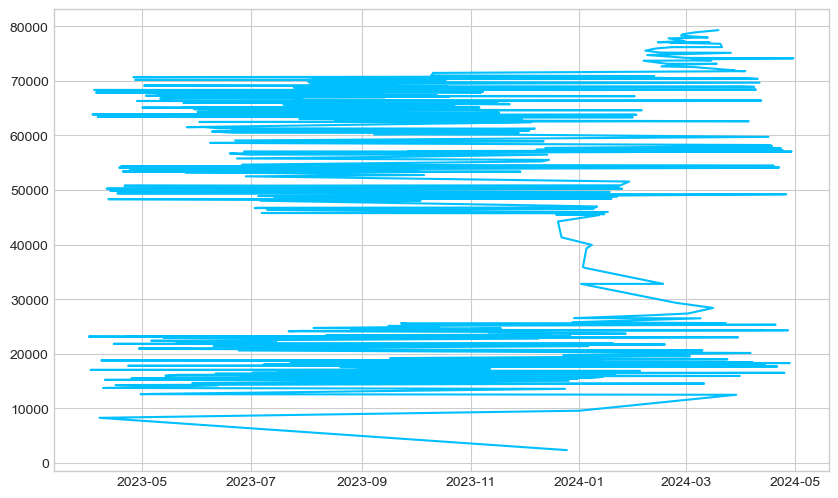

In [110]:
plt.figure(figsize = (10,6))
plt.plot(data_filtered.index, data_filtered['MyWay'], color = 'deepskyblue')
plt.show()
#Trend is not constant in time

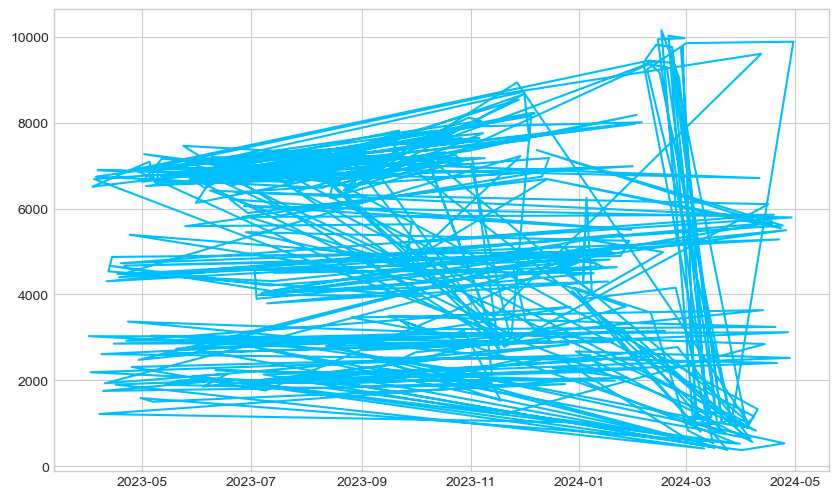

In [111]:
plt.figure(figsize = (10,6))
plt.plot(data_filtered.index, data_filtered['Paper Ticket'], color = 'deepskyblue')
plt.show()
#Trend is not constant in time

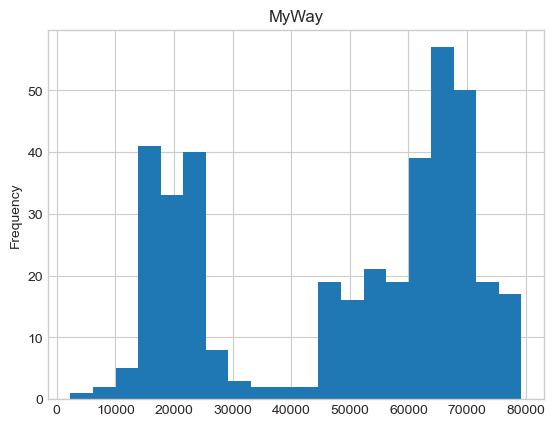

In [112]:
data_filtered['MyWay'].plot(kind='hist', bins=20, title='MyWay')
plt.show()

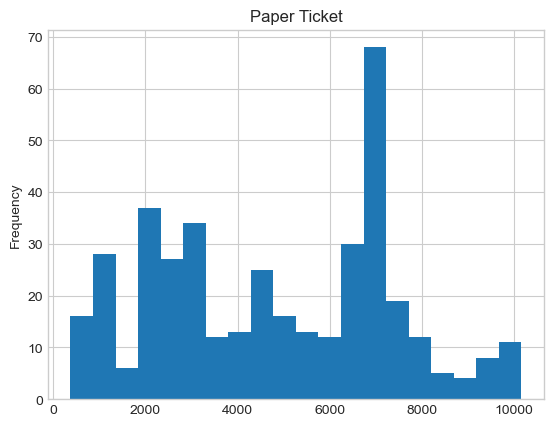

In [113]:
data_filtered['Paper Ticket'].plot(kind='hist', bins=20, title='Paper Ticket')
plt.show()

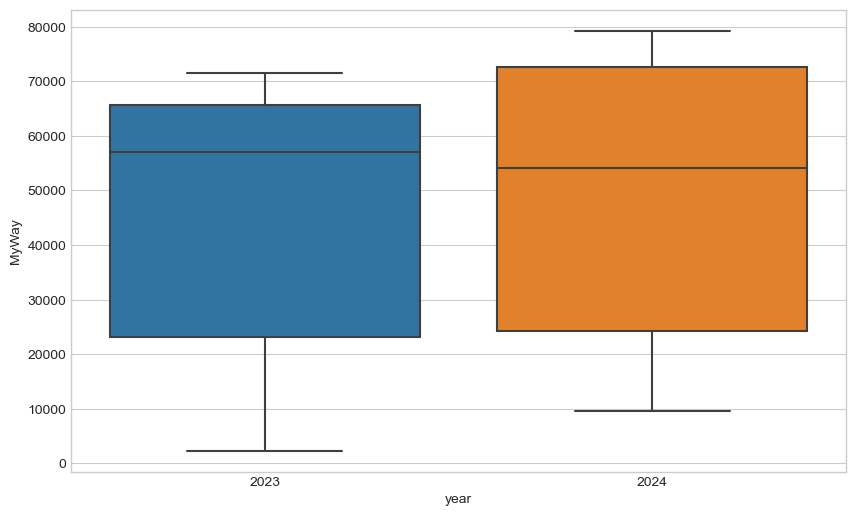

In [114]:
plt.figure(figsize = (10,6))
# data.index.year = convert index data into yearwise data
sns.boxplot(x = data_filtered.index.year, y = data_filtered['MyWay'])
plt.xlabel('year')
plt.show()

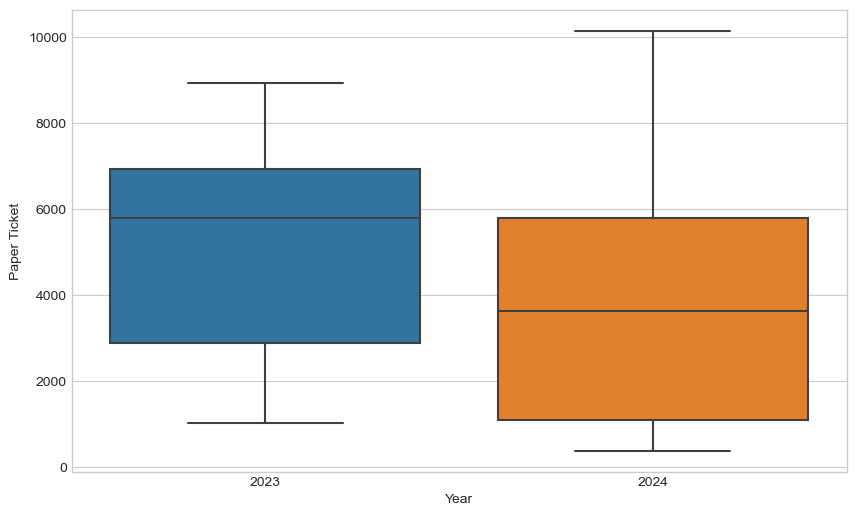

In [115]:
plt.figure(figsize = (10,6))
# data.index.year = convert index data into yearwise data
sns.boxplot(x = data_filtered.index.year, y = data_filtered['Paper Ticket'])
plt.xlabel('Year')
plt.show()

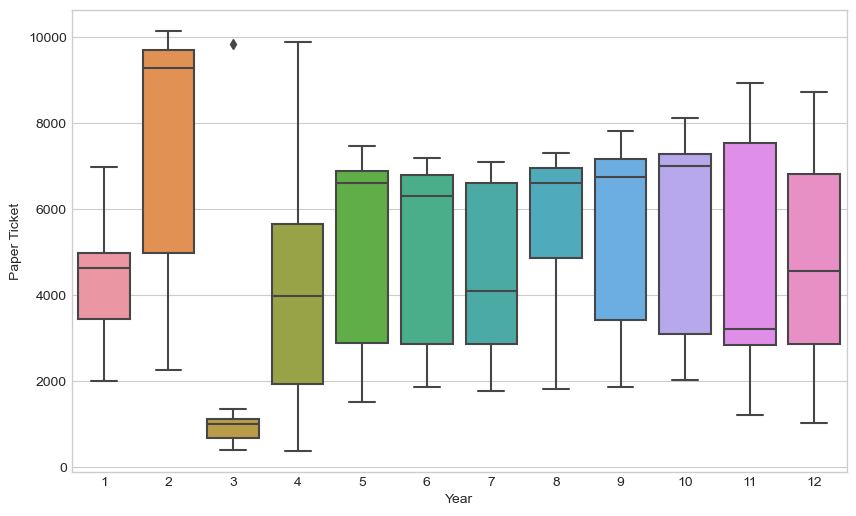

In [116]:
plt.figure(figsize = (10,6))
# data.index.month = convert index data into yearwise data
sns.boxplot(x = data_filtered.index.month, y = data_filtered['Paper Ticket'])
plt.xlabel('Year')
plt.show()

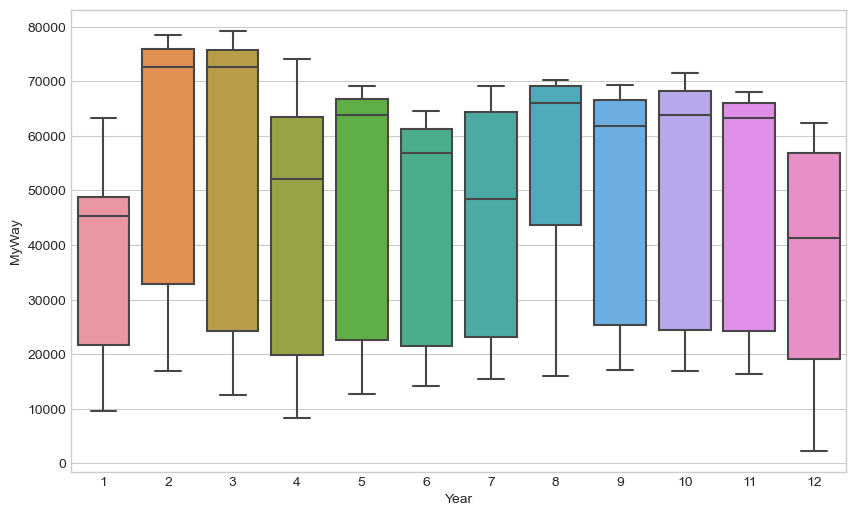

In [117]:
plt.figure(figsize = (10,6))
# data.index.month = convert index data into yearwise data
sns.boxplot(x = data_filtered.index.month, y = data_filtered['MyWay'])
plt.xlabel('Year')
plt.show()

In [118]:
data_filtered['MyWay'].quantile(.25)


23246.25

In [119]:
data_filtered['MyWay'].quantile(.50)

56824.0

In [120]:
data_filtered['MyWay'].quantile(.75)

66537.75

In [121]:
data_filtered['Paper Ticket'].quantile(.25)

2592.0

In [122]:
data_filtered['Paper Ticket'].quantile(.50)

4770.0

In [123]:
data_filtered['Paper Ticket'].quantile(.75)

6900.5

* Median value across years confirm an upwards and downWards trends in Myway and Paper Ticket count
* Steady increase in the spread or IQR range increasing steadily across years.
* Check for Stationarity if this supports well.

In [124]:

from statsmodels.tsa.stattools import adfuller

adf_results = adfuller(data_filtered['MyWay'])
print('Dickey-Fuller Test:')
print('ADF Statistic:', adf_results[0])
print('p-value:', adf_results[1])
print('Critical Values:')
for key, value in adf_results[4].items():
    print(f'\t{key}: {value}')

Dickey-Fuller Test:
ADF Statistic: -0.5469940447608864
p-value: 0.8825151430811469
Critical Values:
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


Based on the Dickey-Fuller test results, the ADF Statistic is -0.9335405980757765 and the p-value is 0.7767264880824922. Comparing the ADF Statistic to the critical values, we can see that it is greater than the 1%, 5%, and 10% critical values. This means that we fail to reject the null hypothesis that the data is non-stationary. Therefore, the data is considered non-stationary.

#Train the model

In [125]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing
model = ExponentialSmoothing(data_filtered['MyWay'], trend='additive', seasonal=12)
model_fit = model.fit()

# Forecast for May 1-7, 2024
forecast_start = '2024-05-01'
forecast_end = '2024-05-07'

forecast = model_fit.forecast(len(pd.date_range(start=forecast_start, end=forecast_end)))


print('Exponential Smoothing Forecast:')
for date, value in zip(pd.date_range(start=forecast_start, end=forecast_end), forecast):
    print(f'{date}: {value}')

C:\Users\hariharan\Anaconda3\python\lib\site-packages\statsmodels\tsa\statespace\exponential_smoothing.py:161: RuntimeWarning: ExponentialSmoothing should not be used with seasonal terms. It has a serious bug that has not been fixed. Instead use ETSModel.
  warnings.warn(
C:\Users\hariharan\Anaconda3\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hariharan\Anaconda3\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Exponential Smoothing Forecast:
2024-05-01 00:00:00: 79181.28692622247
2024-05-02 00:00:00: 79147.47094505592
2024-05-03 00:00:00: 79206.40230659294
2024-05-04 00:00:00: 79410.78464440504
2024-05-05 00:00:00: 79878.01956194644
2024-05-06 00:00:00: 80085.39068573967
2024-05-07 00:00:00: 80303.55934096295


C:\Users\hariharan\Anaconda3\python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hariharan\Anaconda3\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [128]:
mse_fit = np.mean((model_fit.resid)**2)
mae_fit = np.mean(np.abs(model_fit.resid))
rmse_fit = np.sqrt(mse_fit)
print('Model Fit Performance:')
print(f'MSE: {mse_fit}')
print(f'MAE: {mae_fit}')
print(f'RMSE: {rmse_fit}')



Model Fit Performance:
MSE: 847082.4637938177
MAE: 493.62951097417454
RMSE: 920.3708294996195


**MSE**: The mean squared error is a measure of the average squared difference between the predicted values and the actual values. In this case, the MSE is 679887.87, which means that on average, the predicted values are off by about 824.55 units from the actual values.
- **MAE**: The mean absolute error is a measure of the average absolute difference between the predicted values and the actual values. In this case, the MAE is 448.53, which means that on average, the predicted values are off by about 448.53 units from the actual values.
- **RMSE**: The root mean squared error is the square root of the MSE. It is a measure of the standard deviation of the prediction errors. In this case, the RMSE is 824.55, which means that the standard deviation of the prediction errors is about 824.55 units.